In [52]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import warnings
warnings.filterwarnings('ignore')

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [56]:
# !unzip covid-19.zip

Archive:  covid-19.zip
replace Covid19-dataset/test/Covid/0100.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [57]:
train_path = '/content/drive/MyDrive/Covid-19 Detection/Covid19-dataset/train'
test_path = '/content/drive/MyDrive/Covid-19 Detection/Covid19-dataset/test'

In [58]:
os.listdir(train_path +'/Covid')
covid_image = train_path + '/Covid/' + '085.jpeg' 

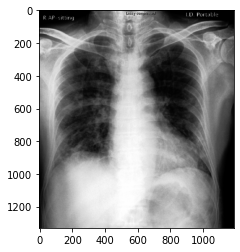

In [59]:
plt.imshow(imread(covid_image))

In [60]:
import random
random.randint(1, 10)

1

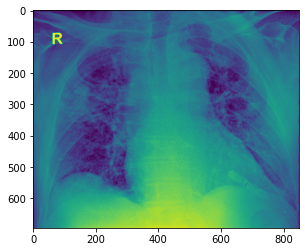

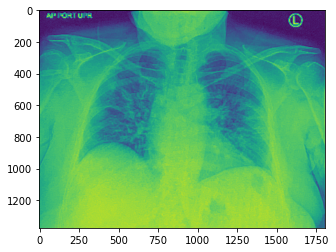

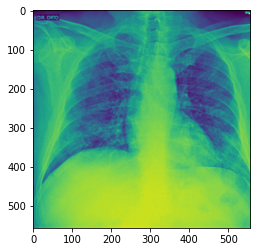

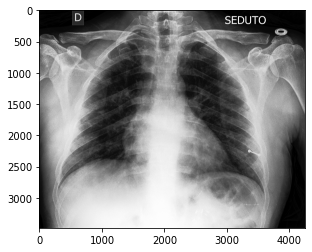

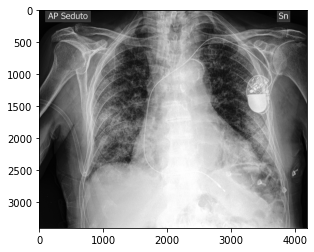

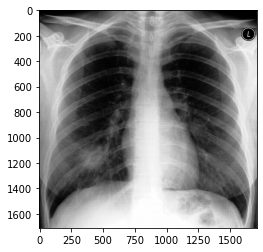

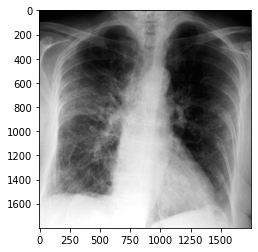

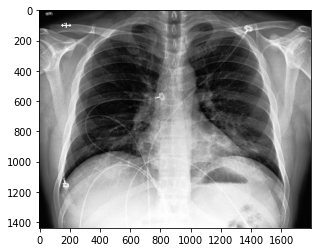

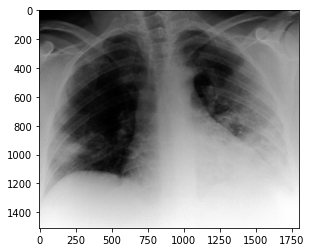

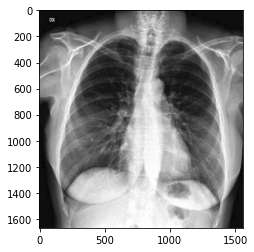

In [61]:
for i in range(10):
  image = os.listdir(train_path +'/Covid')
  random_image = random.choice(image)
  covid_image = train_path + '/Covid/' + random_image 
  plt.imshow(imread(covid_image))
  plt.show()

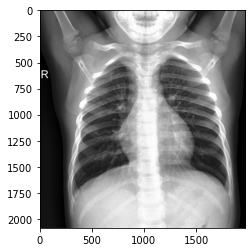

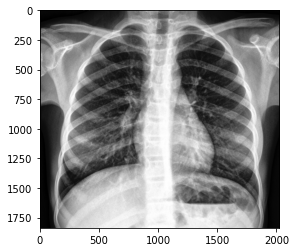

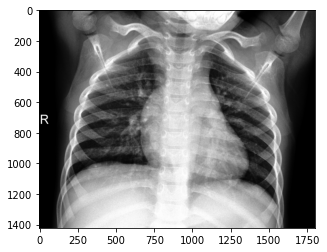

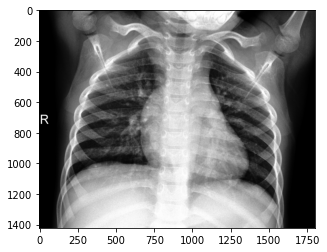

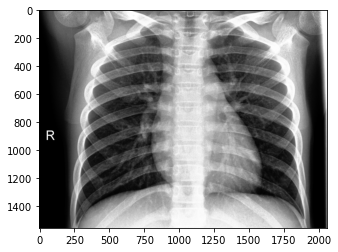

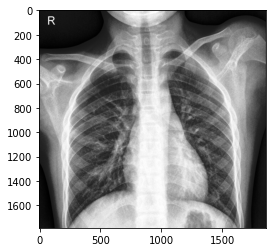

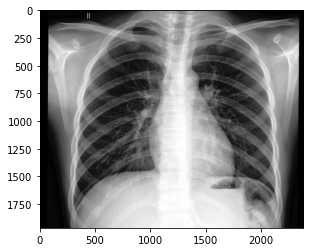

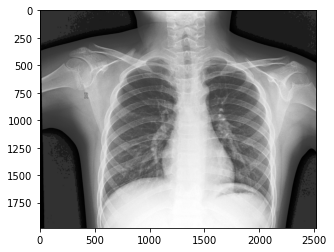

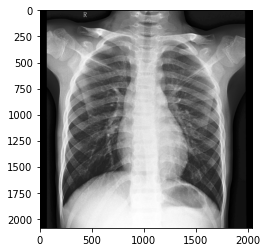

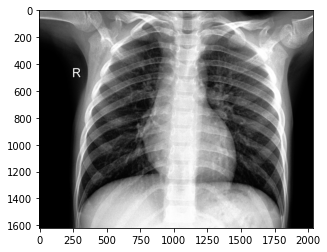

In [62]:
for i in range(10):
  image = os.listdir(train_path +'/Normal')
  random_image = random.choice(image)
  covid_image = train_path + '/Normal/' + random_image 
  plt.imshow(imread(covid_image))
  plt.show()

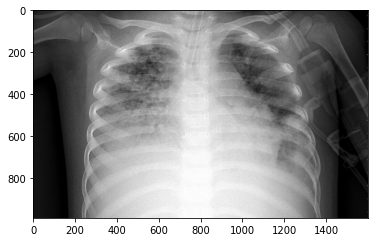

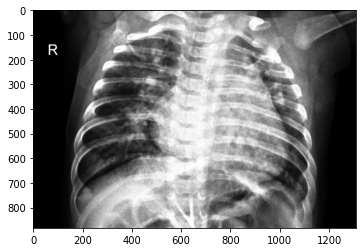

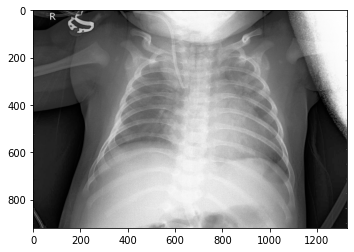

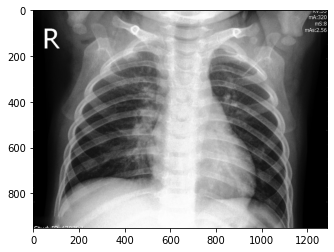

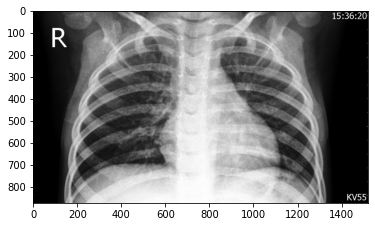

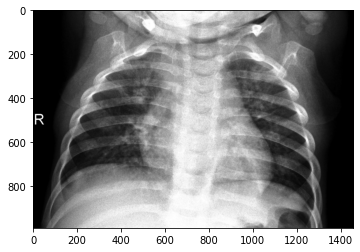

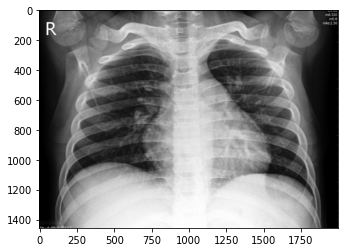

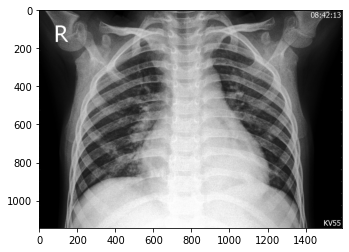

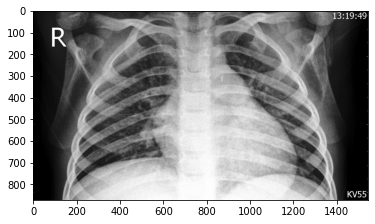

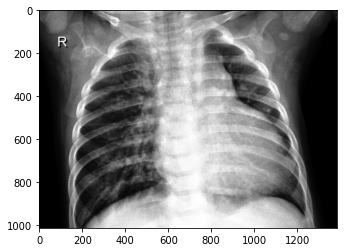

In [63]:
for i in range(10):
  image = os.listdir(train_path +'/Viral Pneumonia')
  random_image = random.choice(image)
  covid_image = train_path + '/Viral Pneumonia/' + random_image 
  plt.imshow(imread(covid_image))
  plt.show()

In [64]:
len(os.listdir(train_path + '/Covid/'))

111

In [65]:
len(os.listdir(train_path + '/Normal/'))

70

In [66]:
imread(covid_image).shape

(1013, 1388, 3)

In [67]:
import seaborn as sns
dim1 = []
dim2 = []
for image in os.listdir(train_path + '/Covid/'):
  img = imread(train_path + '/Covid/' + image)
  print(img.shape)

(3480, 4248, 3)
(1303, 1458, 4)
(2048, 2500, 3)
(2840, 2972, 3)
(954, 955, 4)
(3480, 4248, 3)
(2048, 2494, 3)
(1447, 1884, 3)
(1463, 1989, 3)
(1648, 2150, 3)
(1483, 2059, 3)
(1369, 2061, 3)
(1448, 1592, 3)
(3408, 4200, 3)
(1442, 1727, 3)
(1466, 1723, 3)
(631, 790, 3)
(1285, 1992, 3)
(2190, 2567, 4)
(1710, 1708, 3)
(1439, 1800, 3)
(1800, 1772, 3)
(1474, 1692, 3)
(1472, 1799, 3)
(1505, 1837, 3)
(1800, 1750, 3)
(1482, 1989, 3)
(1800, 1787, 3)
(1546, 1800, 3)
(1570, 1695, 3)
(1779, 1800, 3)
(1479, 1793, 3)
(1522, 1800, 3)
(1593, 1800, 3)
(1508, 1800, 3)
(1412, 1404, 3)
(1611, 1677, 3)
(1308, 1652, 3)
(1546, 1800, 3)
(2336, 2836, 3)
(1668, 1641, 3)
(1165, 1165, 3)
(1668, 1560, 3)
(1161, 1170, 3)
(1403, 1696, 3)
(1262, 1446, 3)
(1970, 1534, 3)
(1146, 1262, 3)
(1835, 2386, 3)
(1517, 1534, 3)
(1243, 1249, 3)
(1517, 1534, 3)
(1517, 1534, 3)
(1517, 1534, 3)
(1550, 1598, 3)
(1272, 1645, 3)
(4095, 3342, 3)
(1402, 1401, 3)
(1343, 1300, 3)
(1163, 1165, 3)
(1332, 1175, 3)
(842, 1090, 3)
(1330, 1187, 

In [76]:
image_shape = (250, 250, 3)

In [77]:
train_data_gen = ImageDataGenerator(rotation_range=30, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.4, horizontal_flip=True, rescale=1/255,)

In [78]:
test_data_gen = ImageDataGenerator(rescale=1/255)

In [79]:
training_set = train_data_gen.flow_from_directory(train_path, target_size=image_shape[:2], class_mode='categorical', batch_size=32)
testing_set = test_data_gen.flow_from_directory(test_path, target_size=image_shape[:2], class_mode='categorical', batch_size=32, shuffle=False)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [80]:
training_set.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [81]:
next(training_set)[0].shape

(32, 250, 250, 3)

In [82]:
next(training_set)[1].shape

(32, 3)

In [89]:
next(training_set)

(array([[[[0.17168134, 0.17168134, 0.17168134],
          [0.1685214 , 0.1685214 , 0.1685214 ],
          [0.16536145, 0.16536145, 0.16536145],
          ...,
          [0.00490173, 0.00490173, 0.00490173],
          [0.00441528, 0.00441528, 0.00441528],
          [0.00420144, 0.00420144, 0.00420144]],
 
         [[0.19870988, 0.19870988, 0.19870988],
          [0.19886743, 0.19886743, 0.19886743],
          [0.19570747, 0.19570747, 0.19570747],
          ...,
          [0.00766046, 0.00766046, 0.00766046],
          [0.00621432, 0.00621432, 0.00621432],
          [0.00641041, 0.00641041, 0.00641041]],
 
         [[0.17939878, 0.17939878, 0.17939878],
          [0.18140964, 0.18140964, 0.18140964],
          [0.18342052, 0.18342052, 0.18342052],
          ...,
          [0.00784314, 0.00784314, 0.00784314],
          [0.00721611, 0.00721611, 0.00721611],
          [0.00761864, 0.00761864, 0.00761864]],
 
         ...,
 
         [[0.33805543, 0.33805543, 0.33805543],
          [0.33748

In [94]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=image_shape))
model.add(MaxPooling2D())

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=image_shape))
model.add(MaxPooling2D())

model.add(Conv2D(128, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128, activation='relu', ))
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))

In [98]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=2)

In [99]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'], )

In [100]:
model.fit(training_set, batch_size=32, epochs=50, callbacks=[early_stop], validation_data=testing_set, validation_batch_size=32)

Epoch 1/50
8/8 [==============================] - 18s 2s/step - loss: 0.8560 - accuracy: 0.6096 - val_loss: 0.7386 - val_accuracy: 0.7727
Epoch 2/50
8/8 [==============================] - 16s 2s/step - loss: 0.7625 - accuracy: 0.6892 - val_loss: 0.6519 - val_accuracy: 0.7424
Epoch 3/50
8/8 [==============================] - 17s 2s/step - loss: 0.6607 - accuracy: 0.7211 - val_loss: 0.6484 - val_accuracy: 0.7576
Epoch 4/50
8/8 [==============================] - 17s 2s/step - loss: 0.6289 - accuracy: 0.6972 - val_loss: 0.6073 - val_accuracy: 0.7576
Epoch 5/50
8/8 [==============================] - 16s 2s/step - loss: 0.6461 - accuracy: 0.7171 - val_loss: 0.6647 - val_accuracy: 0.6970
Epoch 6/50
8/8 [==============================] - 17s 2s/step - loss: 0.5431 - accuracy: 0.7849 - val_loss: 0.5338 - val_accuracy: 0.7879
Epoch 7/50
8/8 [==============================] - 16s 2s/step - loss: 0.6217 - accuracy: 0.7928 - val_loss: 1.6521 - val_accuracy: 0.5455
Epoch 8/50
8/8 [==================

In [102]:
losses = pd.DataFrame(model.history.history)

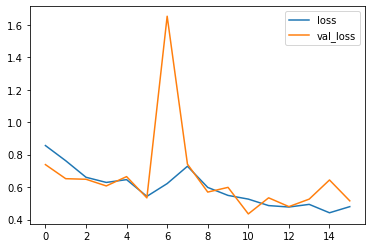

In [103]:
losses[['loss', 'val_loss']].plot()

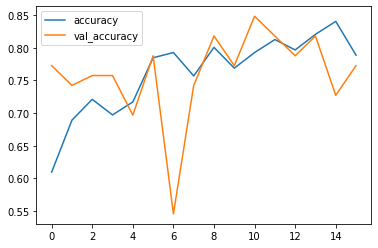

In [104]:
losses[['accuracy', 'val_accuracy']].plot()

In [105]:
model.evaluate(testing_set)

3/3 [==============================] - 2s 507ms/step - loss: 0.5155 - accuracy: 0.7727


[0.515467643737793, 0.7727272510528564]

In [106]:
model.save('classifier.h5')

In [126]:
pred = model.predict(testing_set)

In [120]:
predicted_classes = np.argmax(pred, axis=1)

In [114]:
testing_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [121]:
predicted_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1])

In [123]:
from sklearn.metrics import classification_report,confusion_matrix
true_classes = testing_set.classes
class_labels = list(testing_set.class_indices.keys()) 

In [125]:
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

                 precision    recall  f1-score   support

          Covid       1.00      0.88      0.94        26
         Normal       0.63      0.95      0.76        20
Viral Pneumonia       0.69      0.45      0.55        20

       accuracy                           0.77        66
      macro avg       0.78      0.76      0.75        66
   weighted avg       0.80      0.77      0.77        66



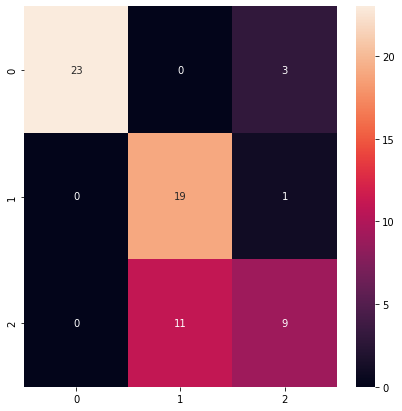

In [127]:
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize = (7,7))
sns.heatmap(conf_matrix, annot=True)